In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(['target','id'], axis=1)
df.head()

feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       1       0   
2       0       0       0       0       0       0       0       1       0   
3       1       0       0       1       6       1       5       0       0   
4       0       0       0       0       0       0       0       0       0   

   feat_10  ...  feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  \
0        0  ...        0        1        0        0        0        0   
1        0  ...        0        0        0        0        0        0   
2        0  ...        0        0        0        0        0        0   
3        1  ...       22        0        1        2        0        0   
4        0  ...        0        1        0        0        0        0   

   feat_90  feat_91  feat_92  feat_93  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        1        0        0        0  

[5 rows x 93 columns]

In [3]:
sc = preprocessing.StandardScaler()
X_df = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
X_df = X_df[:10000]

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
wcss={}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k).fit(X_df)
    wcss[k]=kmeans.inertia_
plt.figure()
plt.title("Elbow Method")
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

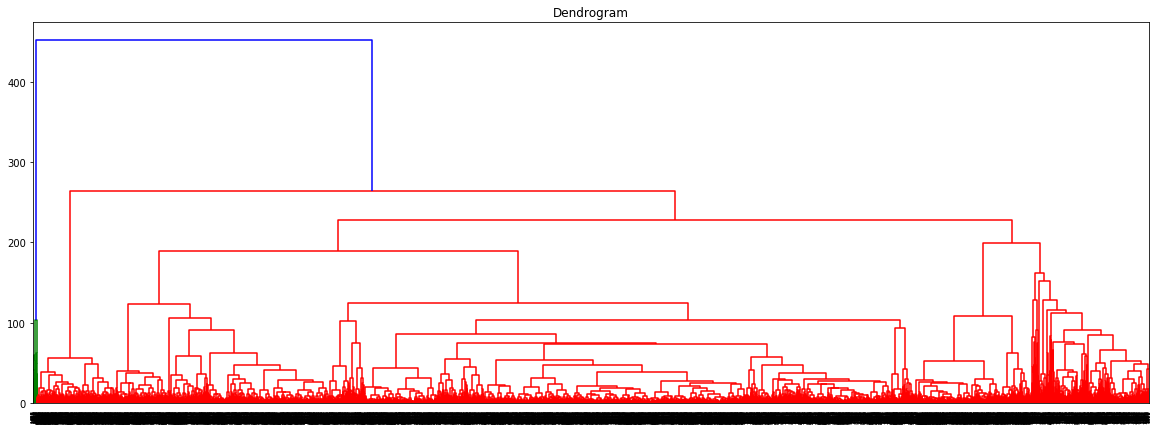

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20,7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_df, method='ward'))

In [6]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_clustering.fit_predict(X_df)
agg_df = X_df
agg_df['clusters'] = agg_clusters
agg_df.head()

feat_1    feat_2    feat_3    feat_4     feat_5    feat_6    feat_7  \
0  0.402093 -0.210106 -0.307165 -0.279443  -0.161867 -0.119331 -0.188045   
1 -0.253508 -0.210106 -0.307165 -0.279443  -0.161867 -0.119331 -0.188045   
2 -0.253508 -0.210106 -0.307165 -0.279443  -0.161867 -0.119331 -0.188045   
3  0.402093 -0.210106 -0.307165  0.079240  13.508710  4.524667  4.665884   
4 -0.253508 -0.210106 -0.307165 -0.279443  -0.161867 -0.119331 -0.188045   

     feat_8    feat_9   feat_10  ...   feat_85   feat_86   feat_87   feat_88  \
0 -0.293664 -0.291038 -0.243606  ...  0.246100 -0.420870 -0.249802 -0.413584   
1  0.149647 -0.291038 -0.243606  ... -0.280099 -0.420870 -0.249802 -0.413584   
2  0.149647 -0.291038 -0.243606  ... -0.280099 -0.420870 -0.249802 -0.413584   
3 -0.293664 -0.291038  0.679472  ... -0.280099 -0.047949  1.019683 -0.413584   
4 -0.293664 -0.291038 -0.243606  ...  0.246100 -0.420870 -0.249802 -0.413584   

    feat_89   feat_90   feat_91   feat_92   feat_93  clusters  
0 -0.299712 -0.176699 -0.129516 -0.386938 -0.104963         1  
1 -0.299712 -0.176699 -0.129516 -0.386938 -0.104963         1  
2 -0.299712 -0.176699 -0.129516 -0.386938 -0.104963         1  
3 -0.299712 -0.176699 -0.129516 -0.386938 -0.104963         3  
4 -0.299712  0.040798 -0.129516 -0.386938 -0.104963         1  

[5 rows x 94 columns]

In [7]:
facet = sns.lmplot(data=agg_df, x='feat_1', y='feat_2', hue='clusters',
                  fit_reg=False, legend=True, size=6)
facet.set(xlabel='feat_1', ylabel='feat_2')
plt.show()

C:\Users\Ankit\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [8]:
kmeans = KMeans(n_clusters = 4).fit(X_df)
kmeans_clusters = kmeans.predict(X_df)
kmeans_df = X_df
kmeans_df['clusters'] = kmeans_clusters

C:\Users\Ankit\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


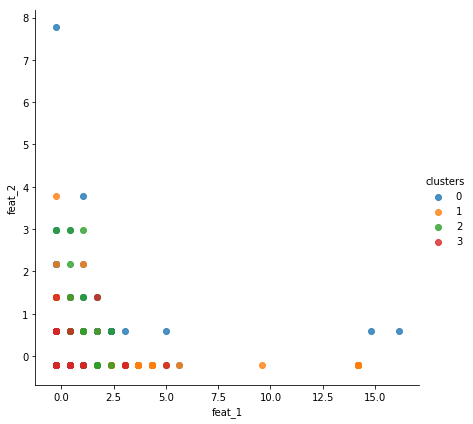

In [9]:
facet = sns.lmplot(data=kmeans_df, x='feat_1', y='feat_2', hue='clusters',
                  fit_reg=False, legend=True, size=6)
facet.set(xlabel='feat_1', ylabel='feat_2')
plt.show()